In [1]:
import os,glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rc("font",family="Arial")

In [33]:
df = pd.read_excel("all_soma_infor_1128_class.xlsx",index_col =0)

In [34]:
dftmp = df.groupby("Class").describe()["cluster"][["count"]]
dftmp.columns = ["All"]

In [35]:
dfVMH = df.loc[df.location == "VMH"]

In [36]:
genes = ['Pdyn','Adcyap1', 'Tac2', 'Sst', 'Tac1', 'Penk']
for geno in genes:
    print(geno)
    dfgeno = dfVMH.loc[dfVMH.geno == geno]
    dfgenotmp = dfgeno.groupby("Class").describe()["cluster"][["count"]]
    dfgenotmp.columns = [geno]
    dftmp = pd.concat([dftmp,dfgenotmp],axis=1)

Pdyn
Adcyap1
Tac2
Sst
Tac1
Penk


In [37]:
dftmp.loc["sum",:] = dftmp.apply(lambda x:x.sum(),axis=0)

In [38]:
dftmp2 = dftmp/dftmp.loc["sum",:]*100

In [15]:
dftmp2

,All,Pdyn,Adcyap1,Tac2,Sst,Tac1,Penk
Class,,,,,,,
Class1,40.473538,20.33195,21.73913,13.72549,48.93617,11.764706,29.487179
Class2,59.526462,79.66805,78.26087,86.27451,51.06383,88.235294,70.512821
sum,100.000000,100.00000,100.00000,100.00000,100.00000,100.000000,100.000000


In [39]:
for geno in genes:
    a = dftmp.loc["Class1","All"]
    b = dftmp.loc["Class2","All"]
    c = dftmp.loc["Class1",geno]
    d = dftmp.loc["Class2",geno]
    obs2 = [[a,b], [c,d]]
    ratio, pvalue =stats.fisher_exact(obs2)
    dftmp2.loc["p_fisher_exact",geno] = pvalue

In [17]:
dftmp2.loc[["p_fisher_exact"],:]

,All,Pdyn,Adcyap1,Tac2,Sst,Tac1,Penk
Class,,,,,,,
p_fisher_exact,NaN,7.506847e-11,0.001266,0.000045,0.237798,9.739021e-09,0.049322


In [40]:
color_dict = {
    'Pdyn' : '#93278f',
    'Adcyap1' : '#ff0000',
    'Tac2' : '#00ffff',
    'Sst' : '#0000ff',
    'Tac1' : '#b4b4b4',
    'Penk' : '#107010'}    

In [41]:
genes_dict = {}
genes_dict["All"] = "black"
for geno in genes:
    genes_dict[geno] = color_dict[geno]

In [20]:
genes_dict

{'All': 'black',
 'Pdyn': '#93278f',
 'Adcyap1': '#ff0000',
 'Tac2': '#00ffff',
 'Sst': '#0000ff',
 'Tac1': '#b4b4b4',
 'Penk': '#107010'}

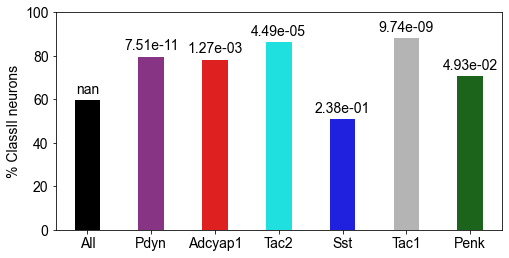

In [42]:
fig, ax = plt.subplots(figsize=(8,4))
dfplot = dftmp2.loc[["Class2"],:]
dflabel = dftmp2.loc[["p_fisher_exact"],:]

sns.barplot(data= dftmp2.loc[["Class2"],:],palette = genes_dict,width = 0.4)

plt.ylim([0,100])
plt.ylabel('% ClassII neurons',fontdict=({'fontsize': 14}))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
for i in range(len(dfplot.T)):
    plt.text(i, dfplot.iloc[0,i] + 3, "{:.2e}".format(dflabel.iloc[0,i]), ha='center',fontdict=({'fontsize': 14}))
plt.savefig("fig2b.pdf",dpi =600,format="pdf")

In [ ]:
color_dict = {
    'Pdyn' : '#93278f',
    'Adcyap1' : '#ff0000',
    'Tac2' : '#00ffff',
    'Sst' : '#0000ff',
    'Tac1' : '#b4b4b4',
    'Penk' : '#107010'}   

In [23]:
dfFish = pd.read_excel("Fish_ratio_2f.xlsx",index_col=0)

In [24]:
dftmp2 = dfFish.T

In [26]:
genes_dict = {}
genes_dict["All"] = "black"
for geno in ['Pdyn', 'Adcyap1', 'Tac2', 'Sst']:
    genes_dict[geno] = color_dict[geno]
genes_dict["Adcyap1&Pdyn"] = "#ea5514"

In [141]:
dftmp2 = dftmp2[["All",'Pdyn', 'Adcyap1', 'Tac2', 'Sst',"Adcyap1&Pdyn"]]

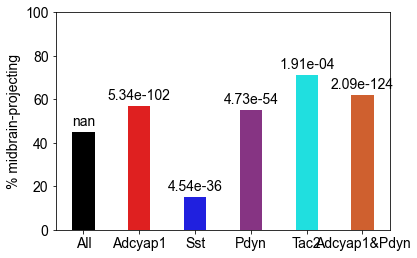

In [30]:
fig, ax = plt.subplots(figsize=(6,4))
dfplot = dftmp2.loc[["ratio"],:]
dflabel = dftmp2.loc[["p"],:]

# sns.barplot(data= dftmp2.loc[["Class2"],:],color = "gray",width = 0.6)
sns.barplot(data= dfplot,palette = genes_dict,width = 0.4)
# sns.swarmplot(data=dfplot,edgecolor="black",linewidth= 0.5,size = 2)
plt.ylim([0,100])
plt.ylabel('% midbrain-projecting',fontdict=({'fontsize': 14}))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
for i in range(len(dfplot.T)):
    plt.text(i, dfplot.iloc[0,i] + 3, "{:.2e}".format(dflabel.iloc[0,i]), ha='center',fontdict=({'fontsize': 14}))
plt.savefig("fig2f.pdf",dpi =600,format="pdf")